# Titanic data analysis

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
# reading the data

In [3]:
data = pd.read_csv('/Volumes/Macintosh HD/Users/user/Desktop/train_titanic.csv', index_col='PassengerId')
dataTest = pd.read_csv('/Volumes/Macintosh HD/Users/user/Desktop/test_titanic.csv', index_col='PassengerId')
data.keys()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data.isnull().sum()    # checking for missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Combining train and test data

In [4]:
fullData = pd.concat((data,dataTest))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [8]:
# indexing : use iloc for position based indexing 
fullData.iloc[2:10, 2:5]

,Embarked,Fare,Name
PassengerId,,,
3,S,7.9250,"Heikkinen, Miss. Laina"
4,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,S,8.0500,"Allen, Mr. William Henry"
6,Q,8.4583,"Moran, Mr. James"
7,S,51.8625,"McCarthy, Mr. Timothy J"
8,S,21.0750,"Palsson, Master. Gosta Leonard"
9,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
10,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)"


In [9]:
fullData.Fare.mean()

33.2954792813456

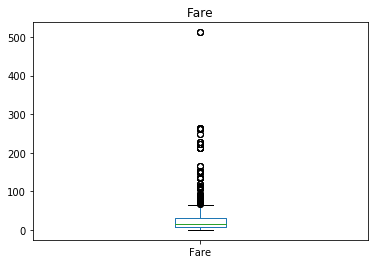

In [10]:
fullData.Fare.plot(kind='box', title='Fare')

In [11]:
fullData.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [12]:
fullData.Survived = fullData.Survived.fillna(-999)   # fill -999 for survived in test data 

In [13]:
fullData.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

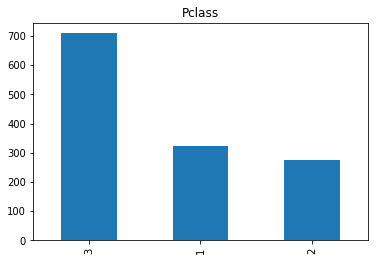

In [14]:
fullData.Pclass.value_counts().plot(kind='bar', title='Pclass')

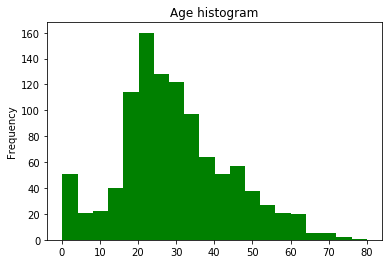

In [15]:
fullData.Age.plot(kind='hist', title='Age histogram', color='g', bins=20);

In [16]:
fullData.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

## seeing relation b/w features

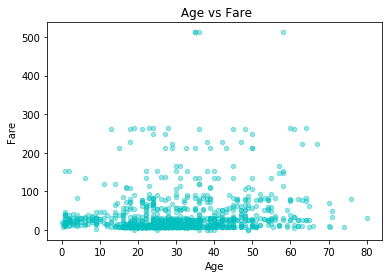

In [17]:
# age and fair
fullData.plot.scatter(x='Age', y='Fare', color='c', title=' Age vs Fare', alpha=0.4 );

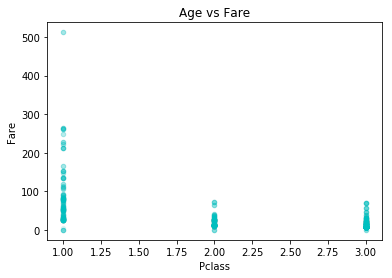

In [18]:
# pclass and fair
fullData.plot.scatter(x='Pclass', y='Fare', color='c', title='Age vs Fare', alpha=0.1 );

In [19]:
fullData.groupby('Pclass').Fare.mean()    # useful results

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [20]:
fullData.groupby('Pclass').Age.mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [21]:
fullData.groupby(['Pclass'])['Fare','Age'].mean()

,Fare,Age
Pclass,,
1,87.508992,39.159930
2,21.179196,29.506705
3,13.302889,24.816367


In [22]:
fullData.groupby(['Pclass', 'Embarked']).Fare.mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [23]:
fullData.groupby(['Pclass', 'Sex']).Age.median()

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [24]:
# crosstab on Sex and Pclass
pd.crosstab(fullData.Sex, fullData.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


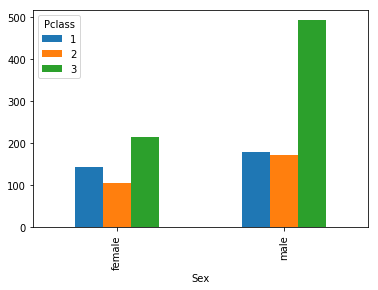

In [25]:
pd.crosstab(fullData.Sex, fullData.Pclass).plot(kind='bar');

## Fill missing values

In [26]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### Embarked

In [27]:
fullData[fullData.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


In [28]:
fullData.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [29]:
pd.crosstab(fullData[fullData.Survived != -999].Survived, fullData[fullData.Survived != -999].Embarked) 

Embarked,C,Q,S
Survived,,,
0.0,75,47,427
1.0,93,30,217


In [30]:
fullData.groupby(['Pclass', 'Embarked']).Fare.median()   # MORE USEFUL , C seems to be best fit

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [31]:
fullData.Embarked.fillna('C', inplace=True)

In [32]:
fullData.Embarked.isnull().sum()     # all places filled

0

### Fare

In [33]:
fullData[fullData.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-999.0,3701


In [34]:
fullData.groupby(['Pclass', 'Embarked', 'Sex']).Fare.median()

Pclass  Embarked  Sex   
1       C         female    83.15830
                  male      62.66875
        Q         female    90.00000
                  male      90.00000
        S         female    78.85000
                  male      35.50000
2       C         female    27.72080
                  male      15.04580
        Q         female    12.35000
                  male      12.35000
        S         female    23.00000
                  male      13.00000
3       C         female    14.45420
                  male       7.22920
        Q         female     7.75000
                  male       7.75000
        S         female    13.77500
                  male       8.05000
Name: Fare, dtype: float64

In [35]:
median_fare = fullData.loc[(fullData.Pclass==3) & (fullData.Embarked=='S') & (fullData.Sex=='male'),'Fare'].median()
print(median_fare)

8.05


In [36]:
fullData.Fare.fillna(median_fare, inplace=True)

In [37]:
fullData.Fare.isnull().sum()

0

### Age

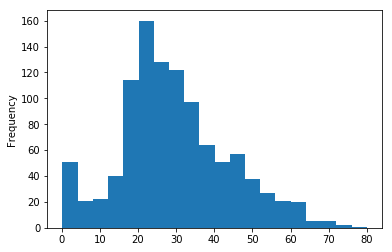

In [38]:
fullData.Age.plot(kind='hist',bins=20)

In [39]:
# seems filling data with mean here is bad step
# looking age groups based on gender

In [40]:
fullData.groupby(['Pclass', 'Sex']).Age.median()   # not too useful except for class 1

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

/Users/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


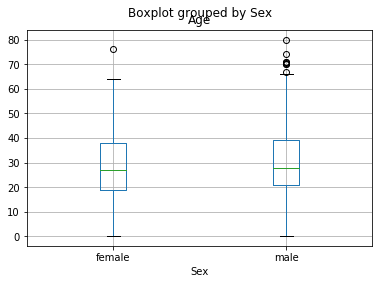

In [41]:
fullData[fullData.Age.notnull()].boxplot('Age','Sex')    # somewhat similar

In [42]:
ageSexMedian = fullData.groupby('Sex').Age.transform('median')  #to fill median values of age according to sex
## fullData.Age.fillna(ageSexMedian, inplace=True)      # not good option

/Users/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


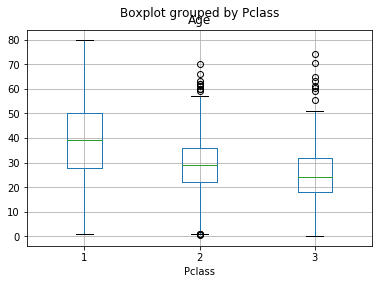

In [43]:
fullData[fullData.Age.notnull()].boxplot('Age','Pclass')    # better than sex but still not great

In [44]:
# lets look for age according to their name title

In [45]:
fullData.loc[:20,['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


In [46]:
def GetTitle(name):
    itle_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [47]:
# use map function to apply the function on each Name value row i
fullData['Title'] = fullData.Name.map(GetTitle)

In [48]:
fullData['Title'].head()

PassengerId
1      mr
2     mrs
3    miss
4     mrs
5      mr
Name: Title, dtype: object

/Users/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


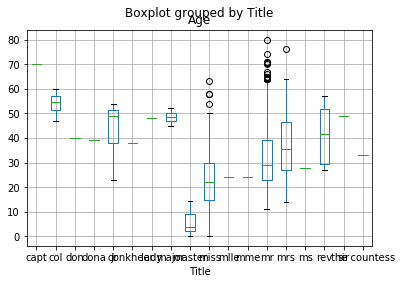

In [49]:
fullData[fullData.Age.notnull()].boxplot('Age','Title')     

In [50]:
fullData.groupby('Title').Age.median()       # looks really useful

Title
capt            70.0
col             54.5
don             40.0
dona            39.0
dr              49.0
jonkheer        38.0
lady            48.0
major           48.5
master           4.0
miss            22.0
mlle            24.0
mme             24.0
mr              29.0
mrs             35.5
ms              28.0
rev             41.5
sir             49.0
the countess    33.0
Name: Age, dtype: float64

In [51]:
medianAgeWRTtitle = fullData.groupby('Title').Age.transform('median')
fullData.Age.fillna(medianAgeWRTtitle, inplace=True)

In [52]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null float64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 172.9+ KB


## Managing outliers

### Fare

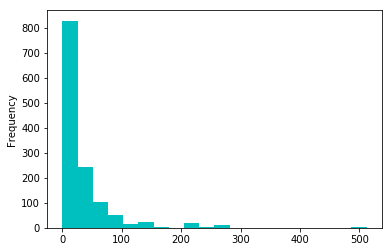

In [53]:
fullData.Fare.plot(kind='hist', color='c', bins=20)

In [54]:
fullData[fullData.Fare == fullData.Fare.max()]    # viewing outliers

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1.0,PC 17755,miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1.0,PC 17755,mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1.0,PC 17755,mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-999.0,PC 17755,mrs


In [55]:
LogFare = np.log(fullData.Fare + 1.0)

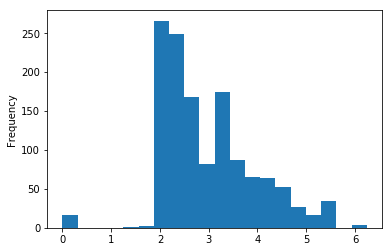

In [56]:
LogFare.plot(kind='hist', bins=20)    # less variations, better

In [57]:
fullData.Fare.update(LogFare)

In [58]:
# binning
pd.qcut(fullData.Fare, 4)

PassengerId
1       (-0.001, 2.186]
2        (3.474, 6.241]
3        (2.186, 2.738]
4        (3.474, 6.241]
5        (2.186, 2.738]
6        (2.186, 2.738]
7        (3.474, 6.241]
8        (2.738, 3.474]
9        (2.186, 2.738]
10       (2.738, 3.474]
11       (2.738, 3.474]
12       (2.738, 3.474]
13       (2.186, 2.738]
14       (2.738, 3.474]
15      (-0.001, 2.186]
16       (2.738, 3.474]
17       (2.738, 3.474]
18       (2.186, 2.738]
19       (2.738, 3.474]
20      (-0.001, 2.186]
21       (2.738, 3.474]
22       (2.186, 2.738]
23       (2.186, 2.738]
24       (3.474, 6.241]
25       (2.738, 3.474]
26       (3.474, 6.241]
27      (-0.001, 2.186]
28       (3.474, 6.241]
29      (-0.001, 2.186]
30      (-0.001, 2.186]
             ...       
1280    (-0.001, 2.186]
1281     (2.738, 3.474]
1282     (3.474, 6.241]
1283     (3.474, 6.241]
1284     (2.738, 3.474]
1285     (2.186, 2.738]
1286     (2.738, 3.474]
1287     (3.474, 6.241]
1288    (-0.001, 2.186]
1289     (3.474, 6.241]
1290

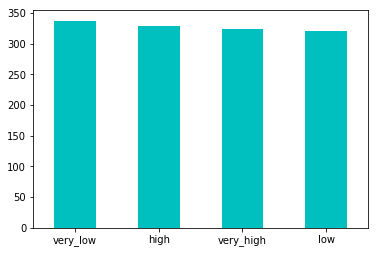

In [59]:
pd.qcut(fullData.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

### Age

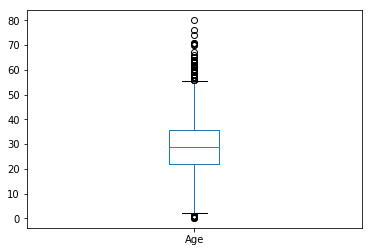

In [60]:
fullData.Age.plot(kind='box')       # Changing these values might result in loss of important data

In [211]:
fullData.Age[fullData['Age'] > 60].size

33

## Making data numerical

In [61]:
refinedData = fullData.copy()

### Sex

In [62]:
refinedData.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [63]:
refinedData.Sex[fullData.Sex == 'male'] = 1
refinedData.Sex[fullData.Sex == 'female'] = 2

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Embarked

In [64]:
refinedData.Embarked.value_counts()

S    914
C    272
Q    123
Name: Embarked, dtype: int64

In [65]:
refinedData.Embarked[refinedData.Embarked == 'S'] = 1
refinedData.Embarked[refinedData.Embarked == 'C'] = 2
refinedData.Embarked[refinedData.Embarked == 'Q'] = 3

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports unti

In [66]:
refinedData.Embarked.value_counts()

1    914
2    272
3    123
Name: Embarked, dtype: int64

### Checking range of features (To check whether normalization is required or not)

In [67]:
# Sex and Embarked are done above and we know its range
# For Pclass
print(refinedData.Pclass.max())
print(refinedData.Pclass.min())

3
1


In [68]:
# For Parch
print(refinedData.Parch.max())
print(refinedData.Parch.min())

9
0


In [69]:
print(refinedData.Fare.max())
print(refinedData.Fare.min())

6.24091735476
0.0


In [70]:
print(refinedData.SibSp.max())
print(refinedData.SibSp.min())

8
0


In [71]:
print(refinedData.Age.max())
print(refinedData.Age.min())       # let train and see whether normalizing it benifits or not

80.0
0.17


# Building Model
## Selecting features for training model

In [72]:
selectedCol = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
finalData = refinedData[selectedCol]


In [73]:
XTrain, XTest = finalData.loc[:891,'Pclass':'Embarked'], finalData.loc[892:,'Pclass':'Embarked']
yTrain = finalData.loc[:891,'Survived']

In [74]:
finalData.info()      # no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
Survived    1309 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 132.0+ KB


In [76]:
scalar = StandardScaler()
XTrainScaled = scalar.fit_transform(XTrain)
XTestScaled = scalar.fit_transform(XTest)

## 1. SVM

In [136]:
svm_clf = SVC( C=0.5, gamma=1)
trainSVC = svm_clf.fit(XTrainScaled, yTrain)
trainSVC.score(XTrainScaled, yTrain)

0.87429854096520765

In [137]:
yTrainPredSVC = trainSVC.predict(XTrainScaled)
accuracy_score(yTrain, yTrainPredSVC)

0.87429854096520765

In [138]:
yTestPredSVM = trainSVC.predict(XTestScaled)

In [139]:
yTestPredSVM = yTestPredSVM.astype('int32')

In [140]:
XTest.index = XTest.index.astype('int32')

In [143]:
solu_df = pd.DataFrame({'PassengerId': XTest.index, 'Survived' : yTestPredRF} )

In [144]:
np.savetxt("Solution_new.csv", solu_df, delimiter=",", fmt='%d')

In [151]:
#np.savetxt("Survived.csv", yTestPredSVM, delimiter=",")

## 2. Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [169]:
parameters = {'n_estimators':[200], 
              'min_samples_leaf':[10, 25, 50],
              'max_features' : ('auto','sqrt','log2'),
               }
rf = RandomForestClassifier(random_state=0, oob_score=True)
clf_rf = GridSearchCV(rf, parameters)

In [170]:
clf_rf.fit(XTrainScaled, yTrain)
clf_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [173]:
clf_rf.best_score_

0.81369248035914699

In [174]:
yTestPredRF = clf_rf.predict(XTestScaled)

In [175]:
testRF_df = pd.DataFrame(data=yTestPredRF,columns=['Survived'])
soluRF_df = pd.concat([index_df, testRF_df], axis=1)

In [176]:
np.savetxt("Solution_new.csv", soluRF_df, delimiter=",", fmt='%d')

In [216]:
model_rf = RandomForestClassifier(random_state=0, min_samples_leaf=5, n_estimators=100, criterion='gini')
model_rf.fit(XTrainScaled, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [217]:
model_rf.score(XTrainScaled, yTrain)

0.87654320987654322

In [198]:
yTestPredRF = model_rf.predict(XTestScaled)
soluRF_df = pd.DataFrame({'PassengerId': XTest.index, 'Survived' : yTestPredRF} )
soluRF_df.to_csv('/Users/user/Titanic/solu_dir.csv', index=False)